# Titanic dataset

We gaan nu dezelfde dataset trainen en fitten. Maar nu met oog naar de parameters van het model. Daarna zullen we de RandomForest introduceren die veel van het parameter tunen al voor je doet! Echter is het ook hier belangrijk om aandacht te schenken aan het paramter tunen. 

Haal hieronder de data binnen. Doet dit voor zowel

- x_test
- y_test
- x_train
- y_train

Zoals het plaatje eerder liet zien zullen we de training set (x_train en y_train) gebruiken om het model te fitten, om het vervolgens te testen op de testset. 


### Actie! 

Ja we kunnen het niet vaak genoeg doen.   
Haal de titanic dataset binnen onder de naam **TTC**  
Haal **x_test, y_test, x_train en y_train** binnen. 


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

TTC = None

x_test = None
y_test = None
x_train = None
y_train = None

In [21]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

# DecisionTree??  

# Pruning waardes.  

Pruning is het aanpassen van de grootte van de tree. Wanneer je meer pruned (letterlijke vertaling : snoeit) dan voorkom je dat de boom verder door splitst op nieuwe features. Net als met een regressie lijn die een steeds  polynomialere functie krijgt, kan een boom die minder pruned (dus groter wordt) steeds complexer worden. En we weten: een complexer model heeft een sterke neiging om te overfitten! 

Hieronder zijn nog een aantal andere parameters die 'getuned' kunnen worden. Neem ze goed door en bedenk je wat voor invloed ze hebben op het model. 


**Gini vs. Entropy** 
Mate waarmee de wanorde in een subset word getoetst.
Gini cijfer voor totale wanorde is 0.5.
Entropy waarde voor totale wanorde is 1.

**Splitter** : best (de beste split in overweging nemend alle feautures) of random (de beste split voor een random subset van feautures, afhankelijk van max_feautures).

**Max_depth** : maximum diepte van de boom. Ofwel hoevaak mag er gesplit worden, hoeveel rijen nodes mogen er gemaakt worden...

**Min_samples_split** : minimum hoeveelheid samples nodig om een internl node te splitsen. default 2.

**Min_samples_leaf** : minimum hoeveelheid om een terminal blad te vormen. (deze is gewichtiger dan min_samp_split).

**Max_features** : int, float, string or None, optional (default=None)
    The number of features to consider when looking for the best split:
    
**Max_leaf_nodes** : maximum hoeveelheid uiteindelijke bladeren (bladeren worden gekozen met beste eerst methode).

**Min_impurity_decrease** : float, optional (default=0.)
    En node wordt slechts gespllitst als er een waarde groter dan of gelijk aan deze van gain in puurheid wordt berekend.


### Actie! 

Vul hieronder verschillende parameter values in en zie wat het doet met de score:


In [16]:
# Zie hieronder alle mogelijke parameters! Kijk naar wat de default value is
# en verzin mogelijke ander waardes. 

DecisionTreeClassifier?

In [18]:
# Bijvoorbeeld deze: Je kan ook gelijk zien in de parameters van het model dat het wordt aangepast. 

DecisionTreeClassifier(max_depth=2) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Kijk wat het doet met de voorspelling van de training set en test set. Is de trainingset vele male hoger? Dan kan er spraken zijn van overfitting! Denk na over wat parameter tuning doet met je voorspellingen. 

In [9]:
decision_tree = DecisionTreeClassifier( # Vul hier mogelijk nieuwe parameterwaardes in in ) 
decision_tree.fit(x_train, y_train)

train_score = decision_tree.score(x_train, y_train)
test_score = decision_tree.score(x_test, y_test)

print("the train score = {}".format(train_score))
print("the test score =  {}".format(test_score))


the train score = 0.9859550561797753
the test score =  0.8044692737430168


### Actie! 

Onthoudt de beste parameter instellingen en sla zie hieronder op. Ze komen later wellicht van pas en we zullen ze aan het einde bespreken. 

# ROC/AUC  

ROC (Receiver Operating Characteristic) plot de false possitive rate tegenover de true possitive rate.  
AUC, area under de curve geeft aan welke waardes we het best kunnen gebruiken ivm overfitting.

# AUC  
  
  AUC geeft eigenlijk een hoe goed het algoritme is in voorspellen aan de hand van een bepaalde waarde van een parameter.  
  Dit kunnen we perfect gebruiken om te besluiten welke waardes goed zijn om overfitten te voorkomen.  
  
  Als we de verschillende AUC's per waarde van depth tegenover elkaar plotten voor voorspellingen op onze test en train data, kunnen we goed zien hoe behoorlijk ons model aan het overfitten was.

In [23]:
from sklearn.metrics import roc_curve, auc

roc_curve(y_test, y_pred)

(array([0.        , 0.14141414, 1.        ]),
 array([0.    , 0.7125, 1.    ]),
 array([2., 1., 0.]))

In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.7855429292929292

Text(0.5, 0, 'Tree depth')

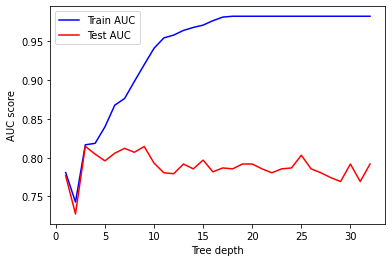

In [26]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_auc = []
test_auc = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_auc.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_auc.append(roc_auc)
    
line1, = plt.plot(max_depths, train_auc, c='b', label="Train AUC")
line2, = plt.plot(max_depths, test_auc, c='r', label="Test AUC")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Tree depth')

# Tradeoff.  

Hoe dieper we gaan, hoe puurder worden de leave-nodes. Maar de variantie van ons model gaat dan ook erg omhoog!  

Variantie en bias zijn twee belangrijke termen binnen Machine Learning algoritmes. Ze geven indicaties op hoe erg je model aan het generaliseren is op de trainingset. Hierbij komen nog twee termen naar boven, namelijk **overfitten** en **underfitten**. Deze termen zijn eerder al benoemd en zullen hier nog even besproken worden. 

Als je bias hoog is (of zoals gezegd wordt, als je model biased is) dan betekend het dat je model systematisch foute voorspellingen maakt. Hier wordt vaak gesproken van underfitting. Je model is niet goed getrained op de trainingset en is niet representatief voor testdata. 

Als je variantie hoog is en bias laag, dan betekend het dat je model aan het overfitten is. Zoals te zien in het plaatje zijn de voorspele datapunten niet allemaal in de roos. Vaak is het zo dat des te complexer je model, des te meer je overfit op de training data, waardoor je testdata minder goed wordt voorspelt. Het kan zijn dat de trainingdata niet representatief genoeg is (of een te kleine set) waardoor de features die het model leert niet goed of voldoende zijn om de testdata te voorspellen. 

![alt text](files/tradoff.png "Title")

We willen dus een lage-bias lage-variantie. Je kan het als volgt interpreteren: 

![alt text](files/tradeoff_graph.png "Title")

je wilt dus een minimun vinden in de opgetelde bias/variantie van een gefitte model. Hieronder zullen we zien hoe je een keuze kan maken in het vinden van goede parameters en features om te voorkomen dat je model overfit op de data.

Afgaand op deze grafiek is een Depth van 4 tot 7 zo'n beetje de beste keuze.

Text(0.5, 0, 'min_samples_split')

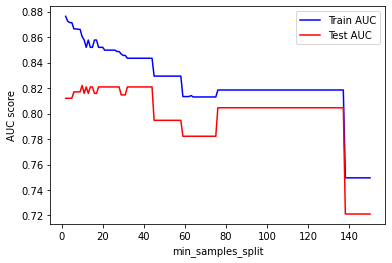

In [27]:
min_samples_splits = np.linspace(2, 150, 148, endpoint=True , dtype=int)

train_auc = []
test_auc = []

for i in min_samples_splits:
    dt = DecisionTreeClassifier(max_depth= 7, min_samples_split=i)
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_auc.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_auc.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_auc, c='b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_auc, c='r', label="Test AUC")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')

Text(0.5, 0, 'min_samples_leaf')

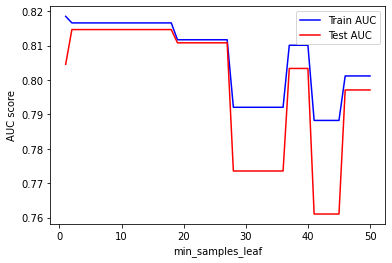

In [28]:
min_samples_leafs = np.linspace(1, 50, 50, endpoint=True, dtype=int)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(max_depth = 7, min_samples_split= 78, min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, c='b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, c='r', label="Test AUC")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')

In [29]:
dt = DecisionTreeClassifier(max_depth = 7, min_samples_split= 78, min_samples_leaf=17)
dt.fit(x_train, y_train)
    
y_pred = dt.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86        99
         1.0       0.89      0.70      0.78        80

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



In [31]:
pd.crosstab(np.asarray(y_test['Survived'] ), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,92,7,99
1.0,24,56,80
All,116,63,179


## Random Forest

Een random forest doet in zekere zin wat de afgelopen tijd hebben uitgevoerd. Het fit een groot aantal bomen met verschillende parameter waardes en verschillende sub-samples van de dataset. De boom functioneert nu in zekere zin zoals een groep mensen een beslissing zouden maken. Iedere boom (of ieder mens) heeft een andere 'mening' (lees: parameters) om een voorspelling te maken. 

Het model evalueert iedere boom met andere paramter instellingen en input, en neemt hierover een gemiddelde om tot de beste voorspelling te komen. Dit voorkomt ook overfitten. Net zoals dat je een gedeeld mening van een grote groep beter kan nemen dan een enkel persoon, is de gemiddelde voorspellende waarde van een boom genomen om high variance te voorkomen. 

Random Forest heeft een groot aantal parameters die je kan tunen. 

    n_estimators=10, 
    criterion=’mse’, 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=’auto’, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=1, 
    random_state=None, 
    verbose=0, 
    warm_start=False
    
    
We zullen in gaan op enkele van deze die belangrijk zijn. 

In [7]:
def plot_tr_te(data, parameter):
    x = list(range(len(data[0])))
    plt.plot(x, data[0])
    plt.plot(x, data[1])
    plt.ylabel("score")
    plt.xlabel(parameter)
    plt.show()

#### n_estimators 

Het aantal bomen dat wordt gefit. Over het algemeen geldt, des te meer bomen, des te beter de voorspelling. Het kost het model wel veel computing power om alles te runnen, er moeten immers veel bomen worden gemaakt! Je bent vaak opzoek naar een punt waarin het aantal estimates voldoende is om je testdata te voorspellen. 

Hieronder zien we dat er bij 20 toch wel een maximum is bereikt

In [8]:
from sklearn.ensemble import RandomForestClassifier

tr_te = []
for i in range(1,50):     
    m = RandomForestClassifier(n_estimators=i)
    m.fit(x_train, list(y_train.Survived));
    
    train_score = m.score(x_train, list(y_train.Survived))
    test_score = m.score(x_test, list(y_test.Survived))
    
    tr_te.append([train_score, test_score])

print(max(tr_te), tr_te.index(max(tr_te)))
plot_tr_te(list(map(list, zip(*tr_te))), "n_estimators")

AttributeError: 'NoneType' object has no attribute 'Survived'

#### max_depth

Doe nu hetzelfde voor max_depth! Neem een range die voor jou aannemelijk is. Doe daarna een 'voorspelling' over wat de beste range is om aan te passen in je parameters. 

### Actie! 

Ach de actie staat hierboven beschreven. Voer het nu uit! 

In [2]:
tr_te = []
for i in range(1,50):     
    m = RandomForestClassifier(# Vul de paramter hier in)
    m.fit(x_train, list(y_train.Survived));
    
    train_score = m.score(x_train, list(y_train.Survived))
    test_score = m.score(x_test, list(y_test.Survived))
    
    tr_te.append([train_score, test_score])

    
plot_tr_te(list(map(list, zip(*tr_te))), # Pas de naam van de paramter hier aan)

SyntaxError: invalid syntax (<ipython-input-2-8b1e041c40ea>, line 4)

#### max_features


### Actie! 

Kijk hoe de parameter max_features zich gedraagd met verschillende input values. Wat vindt je voor informatie uit deze grafiek? Wat zegt dit over het tunen van deze paramater? 

Extra info over hoe sklearn omgaat met deze paramter: 

*Volgens de sklearn documentatie zal een forest altijd een split zoeken hoger dan de maximum aangegeven hoeveelheid features als ze geen geldige partitie kunnen vinden van de node samples.* 

In [5]:
tr_te = []
for i in range(1,len(x_train.columns)):     
    m = RandomForestClassifier(# Vul de parameter met value hier in)
    m.fit(x_train, list(y_train.Survived));
    
    train_score = m.score(x_train, list(y_train.Survived))
    test_score = m.score(x_test, list(y_test.Survived))
    
    tr_te.append([train_score, test_score])

    
plot_tr_te(list(map(list, zip(*tr_te))), # Pas de naam van de paramter hier aan)
print(x_train.columns)

SyntaxError: invalid syntax (<ipython-input-5-fd54bf47a845>, line 4)

#### min_sample_split

### Actie! 

Kijk hoe de parameter min_sample_split zich gedraagd met verschillende input values. Wat vindt je voor informatie uit deze grafiek? Wat zegt dit over het tunen van deze paramater? 

In [4]:
tr_te = []

min_samples_leafs = np.linspace(0.1, 0.8, 5, endpoint=True)

for i in min_samples_leafs:     
    m = RandomForestClassifier(# Vul de parameter met instelling hier in)
    m.fit(x_train, list(y_train.Survived));
    
    train_score = m.score(x_train, list(y_train.Survived))
    test_score = m.score(x_test, list(y_test.Survived))
    
    tr_te.append([train_score, test_score])

    
plot_tr_te(list(map(list, zip(*tr_te))), # Pas de naam van de paramter hier aan)

SyntaxError: invalid syntax (<ipython-input-4-d26b3f0f36ea>, line 7)

#### Criterion

Doe dit ook voor de Criterion! Gini of entropy, kan je zien welke beter is? 

In [9]:
tr_te = []

crit = # Vul hier de criteria in! 

for i in crit:     
    m = RandomForestClassifier(# Vul hier de paramter waardes in)
    m.fit(x_train, list(y_train.Survived));
    
    train_score = m.score(x_train, list(y_train.Survived))
    test_score = m.score(x_test, list(y_test.Survived))
    
    tr_te.append([train_score, test_score])

    
train = list(map(list, zip(*tr_te)))[0]
test = list(map(list, zip(*tr_te)))[1]

print("Entropy, training set: {}, test set: {}".format( train[0], test[0]))
print("Gini,    training set: {}, test set: {}".format( train[1], test[1]))

SyntaxError: invalid syntax (<ipython-input-9-545406405cfe>, line 3)

#### ROC Curve 

Nog algemeen de ROC curve. Hier hoef je niets mee te doen. Slechts ter orientatie. 

[link naar scikit roc curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html).

In [10]:
from sklearn.metrics import plot_roc_curve

m = RandomForestClassifier()
m.fit(x_train, list(y_train.Survived));

plot_roc_curve(m, x_test, y_test)

AttributeError: 'NoneType' object has no attribute 'Survived'

# Hyperparameter tuning

Klinkt als een spannend science fiction boek? Bijna ja. Dit is een methode om je model te optimaliseren voor het voorspellen van je dataset. Je ben namelijk op zoek naar de OPTIMALE parameters! Hierboven hebben we al een en ander uitegezocht. Maar er is nog meer wat we kunnen doen. We kunnen namelijk een willekeurige set aan paramter values maken en die testen op ons random forest! 

### Actie! 

Neem een aantal waardes voor de parameters waarvan JIJ denkt dat ze een GOEDE range zijn voor het voorspellen van je dataset. Doe dit voor de volgende parameters: 

    'bootstrap'
    'max_depth'
    'max_features'
    'min_samples_leaf'
    'min_samples_split'
    'n_estimators'
    
Als je denkt dat een van deze parameters geen toegevoegde waarde heeft bij het voorspellen van ons model, dan mag je deze er uit laten. Als je denkt, wow er mist er echt een die mijn model enorm gaat verbeteren, voeg deze dan toe met values. 

Een advies voor n_estimators is bijvoorbeeld: 

    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]


In [43]:
random_parameters = {'bootstrap': [True, False],
                     'max_depth': [# Vul values in ],
                     'criterion': [# Vul values in]
                     'min_samples_leaf': [# Vul values in],
                     'min_samples_split': [# Vul values in],
                     'n_estimators': [#Vul values in]
                    }

SyntaxError: invalid syntax (<ipython-input-43-db737f5e2889>, line 3)

### Oke nu kunnen we deze testen! 

Dit is nu nog in proces. Mocht je zover zijn dan moet je even de docenten bereiken. Wellicht doen we dit klassikaal!

In [ ]:
# Kijk wat de beste parameters zijn




